<a href="https://colab.research.google.com/github/Amaljayaranga/DavisDataset/blob/master/DavisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

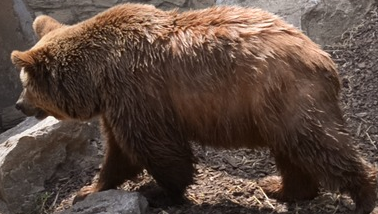

In [4]:
import torch
from torch.utils.data import Dataset
import numpy as np
from PIL import Image
import json
from google.colab.patches import cv2_imshow
import torchvision.transforms


class DavisDataset(Dataset):

    def __init__(self, memmap, json_data):
        self.memmap = memmap
        self.json_data = json_data

    def __len__(self):
        return len(self.memmap)

    def __getitem__(self, index):
        imgs = self.json_data['imgs']
        for img in imgs:
            idx = int(img['index'])
            if idx == index:
                objects = img['objects']
                for object in objects:
                    #print(object)
                    x = object['x']
                    y = object['y']
                    width = object['width']
                    height = object['height']
                    img = newfp[index]
                    crop_img = img[y:y + height, x:x + width]
                    return  torch.from_numpy(crop_img)



#loading memmap
folder_path = './'
complete_shape=(82,480,854,3)
complete_memmap = folder_path+'memmap'
newfp = np.memmap(complete_memmap, dtype='uint8', mode='r', shape=complete_shape)

#loading json
with open('datajson.txt') as json_file:
    data_json = json.load(json_file)

siamese = DavisDataset(newfp, data_json)
img = siamese.__getitem__(1)
img_np = img.cpu().detach().numpy()
cv2_imshow(img_np)